# Project1 Used Library  
***  
### **INDEX**  
>  
> **1. 바이너리 파일을 문자열로 변경 - base64**<br>
> **2. 문자열 다루기 - textwrap, re**<br>
> **3. 단어 개수 구하기 - collections.Counter**<br>
> 4. 문서 요약하기 - gensim <br>
> **5. 텍스트 파일 저장 - open, close**<br>
>  

## 1. 바이너리 파일을 문자열로 변경

> ### **바이너리 파일 (Binary file)** 
>
> - 바이너리 파일이란 ‘0’ 과 ‘1’ 을 이용한 **2진수 데이터** 만으로만으로 인코딩된 파일
> - 사람이 직접 읽을 수 없다
> - 데이터를 효율적으로 처리, 저장, 실행 등을 목적으로 만들어진 파일
> - 장점
>    - 데이터를 처리하고 전송하는데 일반적으로 비용이 적게 든다.
>    - 텍스트 파일에 비해서 데이터 처리 속도가 빠르다.
>    - 데이터 저장 공간도 적게 듦
> - 대표적인 확장자 : exe, dll, zip, rar, mp3, mpg, jpg, png 등

> ### **Base64 인코딩**
> - 다양한 통신채널 (HTML, 이메일 등) 을 통해 **바이너리 데이터**를 **안전하게 전송**할 수 있게 하는 방법
> - ASCII, Unicode 인코딩과 함께 실생활에서도 많이 사용되는 인코딩 방법
> - ASCII (8bit) 인코딩은 프로토콜,시스템마다 다르게 해석되어 데이터가 왜곡될 여지가 있기 때문에 적합하지 않음
> - XML이나 HTTP 프로토콜에서도 특수문자 파싱 문제를 해결할 수 있는 수단
> - 64 진법은 ASCII문자들을 모두 표현할 수 있는 가장 작은 진법
>    - `문자열 입력` -> `ASCII/Binary (8bit)` -> `6bit cut` -> `base64`
> - [Base64 인코딩 테이블](https://en.wikipedia.org/wiki/Base64)<br>
> <img src='img/base64_example.png' width="65%"><br>

### 1-1. 바이트 문자열 인코딩/디코딩

In [70]:
import base64

In [71]:
string = 'Life is too short, We need Python !'

In [72]:
# base64 인코딩
#encoded = base64.b64encode(string)

Error 발생!<br>
**Base64는 바이트 형태의 데이터만 인코딩 가능**<br>
-> 아스키 코드로 변환 필요<br>

In [73]:
# ascii 인코딩
bstring = string.encode('ascii')
print(bstring)
# base64 인코딩
encoded = base64.b64encode(bstring)
print(encoded)

b'Life is too short, We need Python !'
b'TGlmZSBpcyB0b28gc2hvcnQsIFdlIG5lZWQgUHl0aG9uICE='


In [74]:
# base64 디코딩
decoded = base64.decodebytes(encoded)
print(decoded)
# ascii 디코딩
decoded_str = decoded.decode('ascii')
print(decoded_str)

b'Life is too short, We need Python !'
Life is too short, We need Python !


### 1-2. 이미지 인코딩/디코딩

#### 인코딩

In [75]:
import base64
path = "./img/0005303739_001_20220828154501895.jpg"

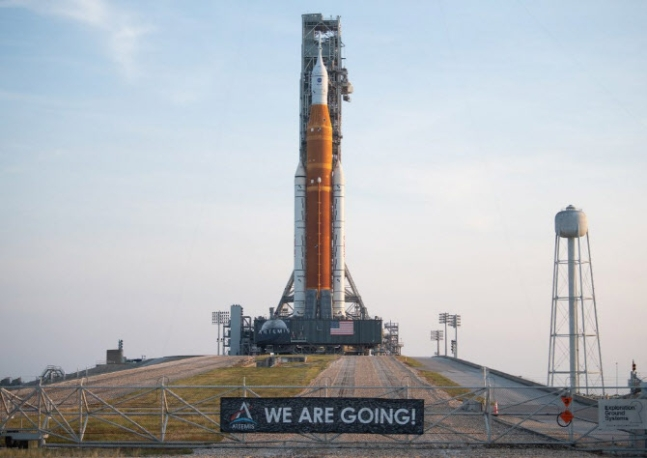

In [76]:
# 이미지 확인
from PIL import Image
img = Image.open(path)
img

In [77]:
# 바이너리 파일 읽기
with open(path, 'rb') as img:
    image = img.read()

In [78]:
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01\xca\x02\x87\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\x07\x08\t\x00\n\xff\xc4\x00Q\x10\x00\x01\x03\x02\x04\x04\x02\x08\x05\x03\x03\x02\x04\x03\x01\x11\x01\x02\x03\x04\x05\x11\x00\x06\x12!\x07\x131AQa\x08\x14"q\x81\x91\xa1\xf02\xb1\xc1\xd1\xe1\t\x15#\x16B\x

In [79]:
# 바이트 정보 확인
from bitstring import BitArray
input_str = '0xff'
c = BitArray(hex=input_str)
c.bin

'11111111'

In [80]:
# base64 인코딩
with open(path, 'rb') as img:
    data = img.read()
    encoded = base64.b64encode(data)
    print(encoded)

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAHKAocDASIAAhEBAxEB/8QAHgAAAQMFAQEAAAAAAAAAAAAABAIDBQEGBwgJAAr/xABREAABAwIEBAIIBQMDAgQDAREBAgMEBREABhIhBxMxQVFhCBQicYGRofAyscHR4QkVIxZC8VJiFyQzciWSorI0gtLiJkNjChgnNURTg6PC8v/EAB0BAAEFAQEBAQAAAAAAAAAAAAIAAQMEBQYHCAn/xABKEQACAQIEBAQEBAYBAwIDBAsBAhEDIQAEEjEFQVFhEyJx8IGRodEGMrHBFCNCUuHxBxUzYiRyCCVTFzRDY4KSFjU2RGSyc6LS/9oADAMBAAIRAxEAPwDsTDcpUc/4VRfPcb/H4ePXp4Yno1bhsD/CU6b773sO5G/gep+vbCDIJ02F+vTfxxKMAoBAB3Ftge4PTy6D3Y+jm4cGiX1AAiNERMT/AFcwD6d8fPS8UrKQVRVIsCtrWnkelumM5tV2Euydva9k2ULi+1ulh3tv4b4kW5jSk2ZtpIte4OxuN7G1sYRiEJTpBHtCxAPjcdPD8u2LmgynmE2QoBItcXsfMjzH8HFV+GKsALyGkdDI732E9sS0uK1iwWqbGBqk225CN4PPnGMotnWNFvxG3Xp/Hft364lo0ZFgHPwb6r9h2+v67DFnUyqI0hLqhcnY3APb6dfz88Xm1OjqQgGxFt7b7Hf2tiLeeKDUXRirLJG4+Vsa9KvTZRpaSTYd7RJuI78sTcCEgpUGydJ299t/v3YuOPE02G+97EDv4n+ehxEQJ8NCUg2tsOu3Tt

#### 디코딩

In [81]:
# base64 디코딩
decoded = base64.decodebytes(encoded)
print(decoded)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01\xca\x02\x87\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\x07\x08\t\x00\n\xff\xc4\x00Q\x10\x00\x01\x03\x02\x04\x04\x02\x08\x05\x03\x03\x02\x04\x03\x01\x11\x01\x02\x03\x04\x05\x11\x00\x06\x12!\x07\x131AQa\x08\x14"q\x81\x91\xa1\xf02\xb1\xc1\xd1\xe1\t\x15#\x16B\x

In [82]:
# 이미지 파일로 저장
file = "img/decoded.png"

with open(file, 'wb') as file:
    file.write(decoded)

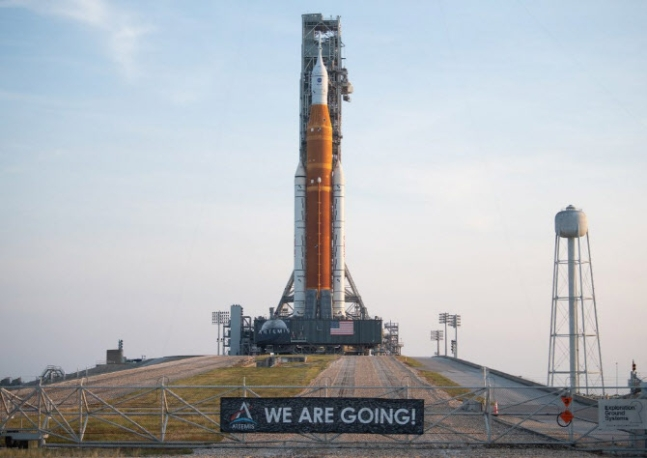

In [83]:
# 이미지 확인
de_img = Image.open("./img/decoded.png")
de_img

## 2. 문자열 다루기

### 2-1. textwrap

> - 파이썬에서 **문자열을 보기 좋은 형태**로 정렬 또는 줄바꿈하는데 사용할 수 있는 라이브러리입니다.
> - 원하는 길이에 맞게 줄이기 : textwrap.shorten()
> - 긴 문장 자르기 : textwrap.wrap()
> - 긴 문장 줄바꿈 : textwrap.fill()
> - [샘플 기사](https://www.codingworldnews.com/news/articleView.html?idxno=12116)

In [84]:
import textwrap

In [85]:
text = 'SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은 보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한 분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는 언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나 머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만 최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여 취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터 사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고 싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도 IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과 SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된 언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을 이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다 코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍 기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이 SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른 프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은 애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를 차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로 데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한 데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서 자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서 파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여 데이터를 분석하고 수정한다. 반면, SQL의 최대 장점은 여러 테이블의 데이터를 통합하여 하나의 데이터베이스를 구성할 수 있다는 점이다. 파이썬이나 R과 같은 범용 언어의 기본을 아는 것은 매우 중요하다. 하지만 SQL을 무시한다면, 데이터 사이언스 분야에 취업할 때 쉽지 않을 것이다. 파이썬을 다룰 수 있지만, SQL 능력이 없다면, 데이터 사이언티스트 취업 기회의 60%를 놓칠 수 있다. SQL은 여전히 데이터를 다루기 위한 인기 있는 언어로 SQL을 배우는 것은 데이터 분야 취업을 위해 필수이다. 계속해서 개발되는 새로운 언어와 프레임워크에 주목하기 쉽다. 그러나 SQL을 한 번 학습해 놓으면 데이터 산업에서 커리어를 쌓는 동안 똑똑히 그 값을 할 것이다.'
print(text)

SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은 보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한 분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는 언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나 머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만 최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여 취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터 사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고 싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도 IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과 SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된 언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을 이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다 코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍 기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이 SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른 프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은 애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를 차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로 데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한 데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서 자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서 파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여 데이터를 분석하고 수정한다. 반면, SQL의 최대 장점은 여러 테이블의 데

#### textwrap.shorten()

In [86]:
textwrap.shorten(text, width=200)

'SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은 보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한 분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는 [...]'

In [87]:
textwrap.shorten(text, width=100, placeholder='...[이하줄임]')

'SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은...[이하줄임]'

#### textwrap.wrap()

In [88]:
wrapped_text = textwrap.wrap(text, width=40)

In [89]:
print(wrapped_text)

['SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자', '미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가', '겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은', '보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한', '분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는', '언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나', '머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만', '최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여', '취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터', '사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고', '싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도', 'IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과', 'SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된', '언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을', '이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다', '코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍', '기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이', 'SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른', '프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은', '애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를', '차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로', '데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한', '데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서', '자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서', '파이썬이 

In [90]:
print('\n'.join(wrapped_text))

SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자
미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가
겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은
보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한
분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는
언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나
머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만
최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여
취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터
사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고
싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도
IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과
SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된
언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을
이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다
코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍
기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이
SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른
프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은
애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를
차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로
데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한
데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서
자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서
파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여
데이터를 분석하고 수정한다. 반면, SQL의 최대 장점은 여러 테이블의
데

#### textwrap.fill()

In [91]:
filled_text = textwrap.fill(text, width=40)

In [92]:
print(filled_text)

SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자
미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가
겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은
보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한
분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는
언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나
머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만
최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여
취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터
사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고
싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도
IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과
SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된
언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을
이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다
코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍
기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이
SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른
프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은
애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를
차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로
데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한
데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서
자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서
파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여
데이터를 분석하고 수정한다. 반면, SQL의 최대 장점은 여러 테이블의
데

### 2-2. re

> - **정규표현식(regular expressions)**은 복잡한 문자열을 처리할 때 사용하는 기법으로, 파이썬뿐 아니라 C, 자바, 심지어 문서 작성 프로그램 등 문자열을 처리해야 하는 다양한 곳에서 활용중
> - 특정 문자열 `추출`, `변환` 등에 사용
> - [공식문서](https://docs.python.org/3/library/re.html)

#### re.findall()

- 단어 추출

In [93]:
import re

In [94]:
# 단어 추출
words = re.findall(r'\w+', text)

In [95]:
print(words)

['SQL과', '파이썬은', '전', '세계에서', '가장', '인기', '있는', '프로그래밍', '언어이자', '미래에도', '수요가', '높을', '것으로', '예상된다', '파이썬과', 'SQL은', '활용', '범위가', '겹치기만', '보통', 'SQL은', '직접', '데이터베이스를', '다룰', '때', '이용하며', '파이썬은', '보다', '범용적으로', '프로그래밍에', '활용한다', 'SQL은', '데이터에', '대한', '신속한', '분석이', '필요하거나', '기록을', '불러오고', '결론을', '내릴', '때', '가장', '많이', '이용되는', '언어이다', 'SQL도', '좋은', '언어이지만', 'R과', '파이썬은', '복잡한', '통계', '분석이나', '머신러닝', '자동화', '기능에', '활용할', '때', '그', '장점이', '빛을', '발한다', '하지만', '최근', '데이터', '분야', '채용', '공고', '중', '45', '4', '가', 'SQL', '기술을', '요구하여', '취업', '시장에서', 'SQL의', '수요가', '가장', '높은', '것으로', '나타났다', '데이터', '사이언스', '데이터', '분석', '데이터', '엔지니어링', '머신러닝', '분야에', '취업하고', '싶다면', '파이썬과', 'SQL', '능력이', '유용할', '것이다', '이에', '인도', 'IT', '빅데이터', '전문', '잡지', '애널리틱스', '인사이트가', '아래와', '같이', '파이썬과', 'SQL을', '비교했다', 'SQL은', '데이터를', '요청하고', '추출하기', '위하여', '설계된', '언어이다', '따라서', 'SQL을', '이용하면', '데이터를', '불러올', '수', '있다', '파이썬을', '이용한다면', '구조화된', '데이터를', '수정할', '수', '있다', 'SQL은', '파이썬보다', '코딩이', '어렵다', '채용', '공고만', '보면', 'SQL

- 전화번호 추출

In [96]:
# 연락처 목록
contact = '''김미키 21 010-3344-5566 Mike@google.com 
             김소은 20 010-5032-1111 Soeun@naver.com
             유한슬 34 010-2789-1476 Lyu@school.ac.com
             박민철 40 010 4040 1313 Zoe@school.ac.com
             이민아 23 010-7777-2222 Kate@google.com'''

In [97]:
# 전화번호 추출
regex = r'0\d{1,2}[ -]?\d{3,4}[ -]?\d{3,4}'
 
phone = re.findall(regex, contact)
print("\n".join(phone))

010-3344-5566
010-5032-1111
010-2789-1476
010 4040 1313
010-7777-2222



0: 전화번호의 첫 번째 숫자가 0임을 나타냅니다.<br>
\d{1,2}: 숫자가 1개 또는 2개인 부분을 의미합니다. 여기서 \d는 숫자를 나타내는 메타 문자이며, {1,2}는 1회 또는 2회 발생할 수 있음을 나타냅니다. 따라서 이 부분은 지역번호를 나타내는 부분입니다. (예: 02, 031, 051 등)<br>
[ -]?: 공백이나 하이픈이 0회 또는 1회 발생할 수 있음을 나타냅니다. []는 문자 클래스를 나타내며, -는 하이픈을 의미합니다. ?는 해당 문자가 0회 또는 1회 발생할 수 있음을 나타냅니다. 따라서 이 부분은 지역번호와 나머지 전화번호 사이의 공백이나 하이픈을 허용합니다.<br>
\d{3,4}: 숫자가 3개 또는 4개인 부분을 의미합니다. 이 부분은 지역번호를 제외한 나머지 전화번호의 첫 번째 블록을 나타냅니다. (예: 1234, 5678 등)<br>
[ -]?: 공백이나 하이픈이 0회 또는 1회 발생할 수 있음을 나타냅니다. 이 부분은 첫 번째와 두 번째 블록 사이의 공백이나 하이픈을 허용합니다.<br>
\d{3,4}: 숫자가 3개 또는 4개인 부분을 의미합니다. 이 부분은 두 번째와 세 번째 블록을 나타냅니다. (예: 1234, 5678 등)<br>

In [98]:
# 변환(마스킹)
pat = re.compile(r'0\d{1,2}[ -]?\d{3,4}[ -]?\d{3,4}')
print(pat.sub("***-****-****", contact))

김미키 21 ***-****-**** Mike@google.com 
             김소은 20 ***-****-**** Soeun@naver.com
             유한슬 34 ***-****-**** Lyu@school.ac.com
             박민철 40 ***-****-**** Zoe@school.ac.com
             이민아 23 ***-****-**** Kate@google.com


## 3. 단어 개수 구하기

### collections.Counter

> collections.Counter는 리스트나 문자열과 같은 자료형의 요소 중 **값이 같은 요소가 몇 개인지를 확인**할 때 사용

In [99]:
import collections
import textwrap
import re

In [100]:
# 문자열 편집
text = 'SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을 것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은 직접 데이터베이스를 다룰 때 이용하며 파이썬은 보다 범용적으로 프로그래밍에 활용한다. SQL은 데이터에 대한 신속한 분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는 언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나 머신러닝, 자동화 기능에 활용할 때, 그 장점이 빛을 발한다. 하지만 최근, 데이터 분야 채용 공고 중 45.4%가 SQL 기술을 요구하여 취업 시장에서 SQL의 수요가 가장 높은 것으로 나타났다. 데이터 사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고 싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도 IT·빅데이터 전문 잡지 애널리틱스 인사이트가 아래와 같이 파이썬과 SQL을 비교했다. SQL은 데이터를 요청하고 추출하기 위하여 설계된 언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다. 파이썬을 이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다 코딩이 어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍 기술로 보인다. 하지만 SQL이 수요가 높은 것은 단순히 기업들이 SQL을 다룰 줄 아는 개발자를 원해서가 아니다. 그들은 보통 다른 프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다. 파이썬은 애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를 차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로 데이터베이스를 관리 및 유지하며, 가벼운 분석을 수행하기도 하고 방대한 데이터베이스로부터 기록을 추출하기도 한다. 보통 설문조사에서 자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서 파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여 데이터를 분석하고 수정한다. 반면, SQL의 최대 장점은 여러 테이블의 데이터를 통합하여 하나의 데이터베이스를 구성할 수 있다는 점이다. 파이썬이나 R과 같은 범용 언어의 기본을 아는 것은 매우 중요하다. 하지만 SQL을 무시한다면, 데이터 사이언스 분야에 취업할 때 쉽지 않을 것이다. 파이썬을 다룰 수 있지만, SQL 능력이 없다면, 데이터 사이언티스트 취업 기회의 60%를 놓칠 수 있다. SQL은 여전히 데이터를 다루기 위한 인기 있는 언어로 SQL을 배우는 것은 데이터 분야 취업을 위해 필수이다. 계속해서 개발되는 새로운 언어와 프레임워크에 주목하기 쉽다. 그러나 SQL을 한 번 학습해 놓으면 데이터 산업에서 커리어를 쌓는 동안 똑똑히 그 값을 할 것이다.'
text = textwrap.fill(text, width=50)
print(text)

SQL과 파이썬은 전 세계에서 가장 인기 있는 프로그래밍 언어이자 미래에도 수요가 높을
것으로 예상된다. 파이썬과 SQL은 활용 범위가 겹치기만, 보통 SQL은 직접
데이터베이스를 다룰 때 이용하며 파이썬은 보다 범용적으로 프로그래밍에 활용한다. SQL은
데이터에 대한 신속한 분석이 필요하거나 기록을 불러오고 결론을 내릴 때 가장 많이 이용되는
언어이다. SQL도 좋은 언어이지만 R과 파이썬은 복잡한 통계 분석이나 머신러닝, 자동화
기능에 활용할 때, 그 장점이 빛을 발한다. 하지만 최근, 데이터 분야 채용 공고 중
45.4%가 SQL 기술을 요구하여 취업 시장에서 SQL의 수요가 가장 높은 것으로
나타났다. 데이터 사이언스, 데이터 분석, 데이터 엔지니어링, 머신러닝 분야에 취업하고
싶다면, 파이썬과 SQL 능력이 유용할 것이다. 이에, 인도 IT·빅데이터 전문 잡지
애널리틱스 인사이트가 아래와 같이 파이썬과 SQL을 비교했다. SQL은 데이터를 요청하고
추출하기 위하여 설계된 언어이다. 따라서 SQL을 이용하면, 데이터를 불러올 수 있다.
파이썬을 이용한다면, 구조화된 데이터를 수정할 수 있다. SQL은 파이썬보다 코딩이
어렵다. 채용 공고만 보면 SQL은 가장 수요가 높은 프로그래밍 기술로 보인다. 하지만
SQL이 수요가 높은 것은 단순히 기업들이 SQL을 다룰 줄 아는 개발자를 원해서가
아니다. 그들은 보통 다른 프로그래밍 언어에 SQL까지 다룰 수 있는 개발자를 원한다.
파이썬은 애널리틱스 인사이트 자체 조사에서 가장 인기 있는 프로그래밍 언어 1위를
차지했다. SQL은 10위를 기록하였다. 개발자들은 SQL로 데이터베이스를 관리 및
유지하며, 가벼운 분석을 수행하기도 하고 방대한 데이터베이스로부터 기록을 추출하기도 한다.
보통 설문조사에서 자바스크립트가 프로그래밍 언어 인기도 1위를 차지하지만, 이번 조사에서
파이썬이 1위를 차지했다. 개발자는 파이썬으로 회귀 분석을 수행하여 데이터를 분석하고
수정한다. 반면, SQL의 최대 장점은 여러 테이블의 데

In [101]:
# 단어 추출
words = re.findall(r'\w+', text)
print(words)

['SQL과', '파이썬은', '전', '세계에서', '가장', '인기', '있는', '프로그래밍', '언어이자', '미래에도', '수요가', '높을', '것으로', '예상된다', '파이썬과', 'SQL은', '활용', '범위가', '겹치기만', '보통', 'SQL은', '직접', '데이터베이스를', '다룰', '때', '이용하며', '파이썬은', '보다', '범용적으로', '프로그래밍에', '활용한다', 'SQL은', '데이터에', '대한', '신속한', '분석이', '필요하거나', '기록을', '불러오고', '결론을', '내릴', '때', '가장', '많이', '이용되는', '언어이다', 'SQL도', '좋은', '언어이지만', 'R과', '파이썬은', '복잡한', '통계', '분석이나', '머신러닝', '자동화', '기능에', '활용할', '때', '그', '장점이', '빛을', '발한다', '하지만', '최근', '데이터', '분야', '채용', '공고', '중', '45', '4', '가', 'SQL', '기술을', '요구하여', '취업', '시장에서', 'SQL의', '수요가', '가장', '높은', '것으로', '나타났다', '데이터', '사이언스', '데이터', '분석', '데이터', '엔지니어링', '머신러닝', '분야에', '취업하고', '싶다면', '파이썬과', 'SQL', '능력이', '유용할', '것이다', '이에', '인도', 'IT', '빅데이터', '전문', '잡지', '애널리틱스', '인사이트가', '아래와', '같이', '파이썬과', 'SQL을', '비교했다', 'SQL은', '데이터를', '요청하고', '추출하기', '위하여', '설계된', '언어이다', '따라서', 'SQL을', '이용하면', '데이터를', '불러올', '수', '있다', '파이썬을', '이용한다면', '구조화된', '데이터를', '수정할', '수', '있다', 'SQL은', '파이썬보다', '코딩이', '어렵다', '채용', '공고만', '보면', 'SQL

#### Counter()

In [102]:
# 빈도수 산출
counter = collections.Counter(words)
print(counter)

Counter({'SQL은': 8, '데이터': 8, 'SQL을': 6, '데이터를': 6, '수': 6, '가장': 5, '프로그래밍': 5, '파이썬은': 4, '있는': 4, '수요가': 4, '다룰': 4, '때': 4, '인기': 3, '파이썬과': 3, '보통': 3, '데이터베이스를': 3, '하지만': 3, 'SQL': 3, '높은': 3, '것이다': 3, '있다': 3, '것은': 3, '1위를': 3, '것으로': 2, '기록을': 2, '언어이다': 2, 'R과': 2, '머신러닝': 2, '그': 2, '분야': 2, '채용': 2, '취업': 2, 'SQL의': 2, '사이언스': 2, '분야에': 2, '능력이': 2, '애널리틱스': 2, '파이썬을': 2, '아는': 2, '개발자를': 2, '조사에서': 2, '언어': 2, '차지했다': 2, '분석을': 2, 'SQL과': 1, '전': 1, '세계에서': 1, '언어이자': 1, '미래에도': 1, '높을': 1, '예상된다': 1, '활용': 1, '범위가': 1, '겹치기만': 1, '직접': 1, '이용하며': 1, '보다': 1, '범용적으로': 1, '프로그래밍에': 1, '활용한다': 1, '데이터에': 1, '대한': 1, '신속한': 1, '분석이': 1, '필요하거나': 1, '불러오고': 1, '결론을': 1, '내릴': 1, '많이': 1, '이용되는': 1, 'SQL도': 1, '좋은': 1, '언어이지만': 1, '복잡한': 1, '통계': 1, '분석이나': 1, '자동화': 1, '기능에': 1, '활용할': 1, '장점이': 1, '빛을': 1, '발한다': 1, '최근': 1, '공고': 1, '중': 1, '45': 1, '4': 1, '가': 1, '기술을': 1, '요구하여': 1, '시장에서': 1, '나타났다': 1, '분석': 1, '엔지니어링': 1, '취업하고': 1, '싶다면': 1, '유용할': 1, '이에': 1, '인도':

**덧셈 뺼셈 교집합 합집합 가능**<br>
- 덧셈 : print(a+b)
- 뺄셈 : print(a-b)
- 교집합 : print(a & b)
- 합집합 : print(a | b)


#### most_common()

In [103]:
# 상위 빈도수 단어 추출
print(counter.most_common(5))

[('SQL은', 8), ('데이터', 8), ('SQL을', 6), ('데이터를', 6), ('수', 6)]


***
## 4. 문자 요약하기<br>
<br>
해당 챕터는 버전 호환 문제로 다른 ipynb 파일에 수록<br>

*** 

## 5. 텍스트파일 저장

### open, close

> 파일 객체 = open(파일 이름, 파일 열기 모드) <br>
> 파일 객체.close()

| 파일열기모드 | 설명                                                       |
|--------------|------------------------------------------------------------|
| r            | 읽기모드 - 파일을 읽기만 할 때 사용                        |
| w            | 쓰기모드 - 파일에 내용을 쓸 때 사용                        |
| a            | 추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용 |

#### 파일 생성

In [1]:
# 텍스트 파일 생성
f = open("새파일.txt", 'w')
f.close()

#### 파일 쓰기

In [2]:
# 텍스트 파일 쓰기
f = open("새파일.txt", 'w')
for i in range(1, 11):
    data = "%d번째 줄입니다.\n" % i
    f.write(data)
f.close()

#### 파일 읽기

In [3]:
# 한줄 읽기
f = open("새파일.txt", 'r')
line = f.readline()
print(line)
f.close()

1번째 줄입니다.



In [4]:
# 여러줄 읽기
f = open("새파일.txt", 'r')
line = f.readline()
print(line)
line = f.readline()
print(line)
line = f.readline()
print(line)
f.close()

1번째 줄입니다.

2번째 줄입니다.

3번째 줄입니다.



In [5]:
# 모든 줄 읽기
f = open("새파일.txt", 'r')
lines = f.readlines()
for line in lines:
    print(line)
f.close()

1번째 줄입니다.

2번째 줄입니다.

3번째 줄입니다.

4번째 줄입니다.

5번째 줄입니다.

6번째 줄입니다.

7번째 줄입니다.

8번째 줄입니다.

9번째 줄입니다.

10번째 줄입니다.



#### 내용 추가하기

In [6]:
# w 모드 사용 시
f = open("새파일.txt",'w')
for i in range(11, 21):
    data = "%d번째 줄입니다.\n" % i
    f.write(data)
f.close()

In [7]:
# a 모드 사용 시
f = open("새파일.txt",'a')
for i in range(11, 21):
    data = "%d번째 줄입니다.\n" % i
    f.write(data)
f.close()

#### with 문 사용

In [8]:
# close() 사용 불필요
with open("새파일.txt", "w") as f:
    for i in range(1, 11):
        data = "%d번째 줄입니다.\n" % i
        f.write(data)